<a href="https://colab.research.google.com/github/palakagl/ReinforcementLearning/blob/main/main_windy_gridworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tabular_palak_agrawal
import windy_gridworld_palak_agrawal
import matplotlib.pyplot as plt
import numpy as np

------ Running SARSA ------


No handles with labels found to put in legend.


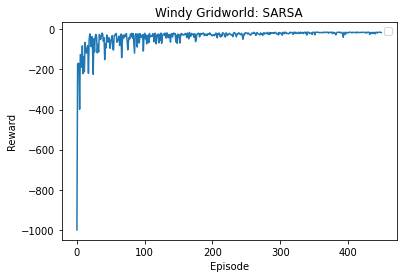

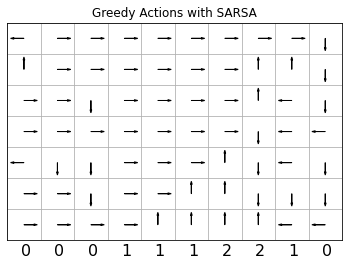

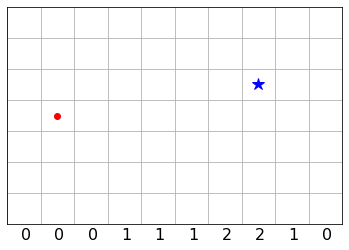

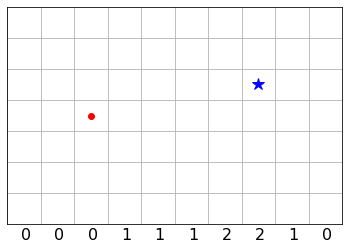

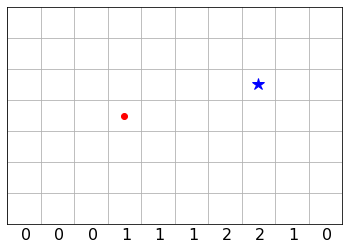

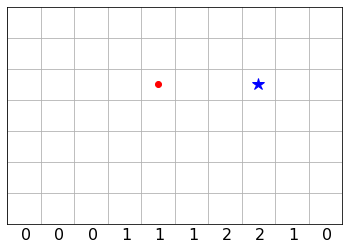

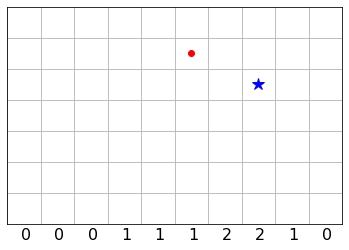

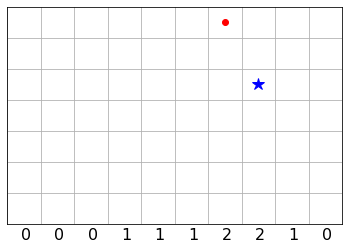

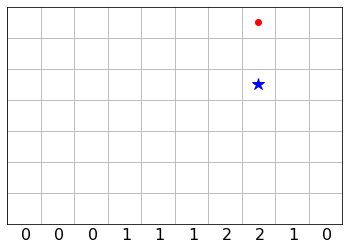

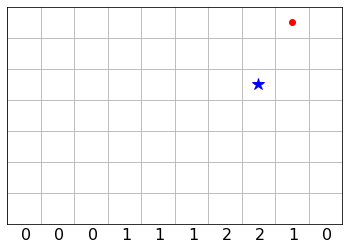

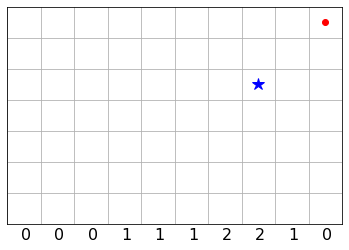

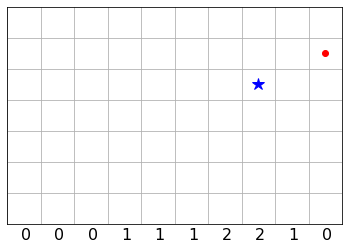

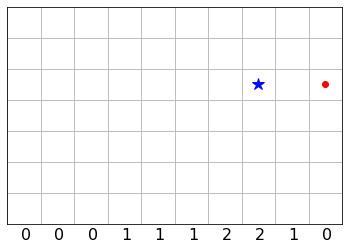

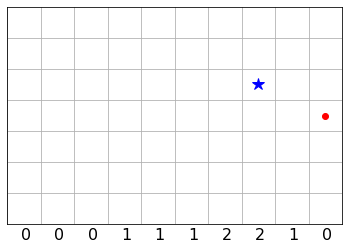

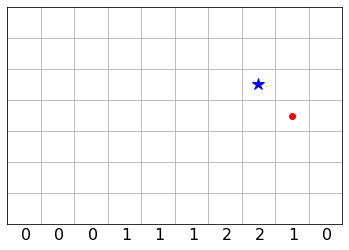

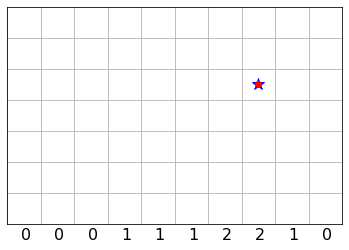

The return of your SARSA solution is -14. The optimal solution is -14.
------ Finished running SARSA ------
------ Running Q-learning ------


No handles with labels found to put in legend.


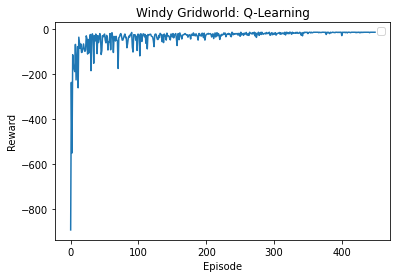

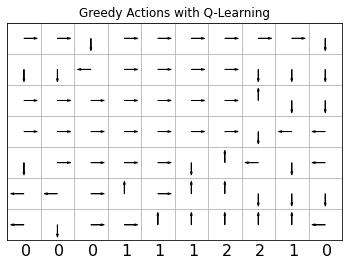

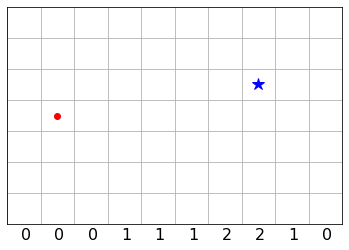

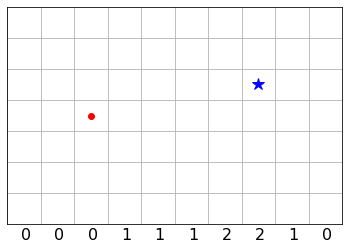

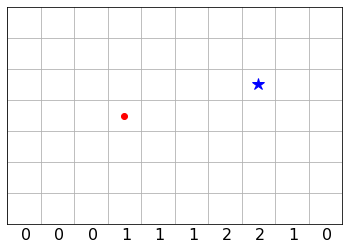

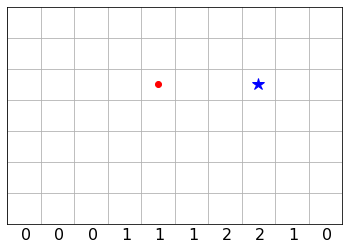

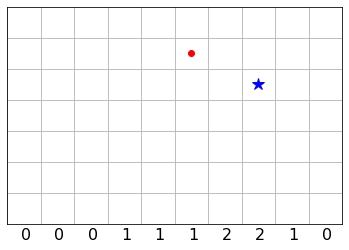

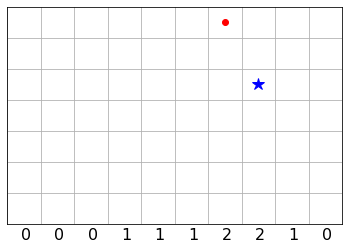

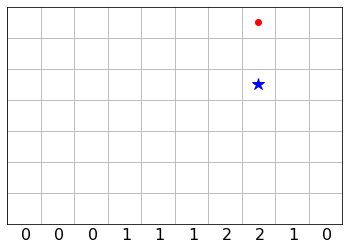

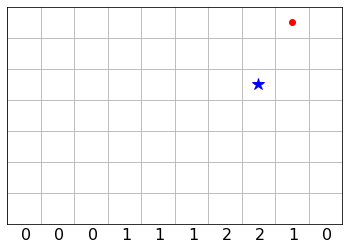

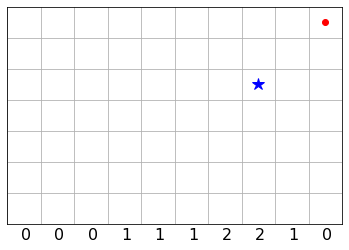

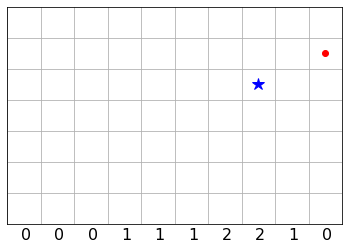

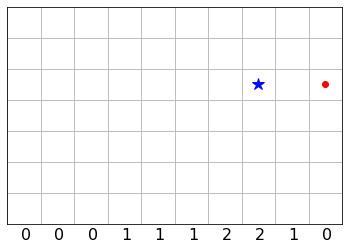

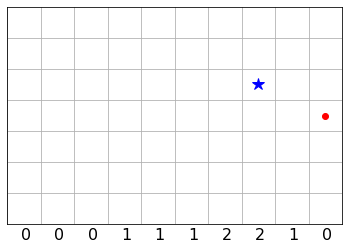

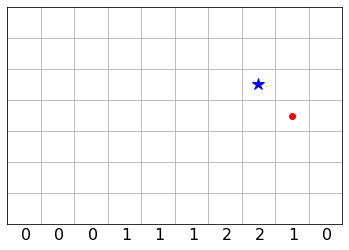

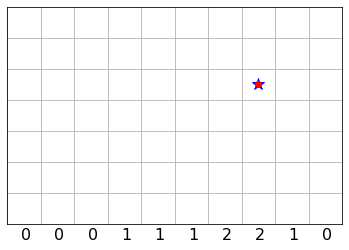

The return of your Q-learning solution is -14. The optimal solution is -14.
------ Finished running Q-learning ------


In [2]:
def plot_rew(title, rew_list):
    plt.ioff()
    plt.title("Windy Gridworld: {}".format(title))
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.plot(rew_list)
    plt.legend()
    plt.show()

def plot_policy(title, table, env):
    
    # matplot lib gridworld adapted from https://www.kaggle.com/nvtnganfb/gridworld
    plt.ioff()
    plt.xlim(0, table.shape[0])
    plt.ylim(0, table.shape[1])
    plt.xticks(np.arange(0, table.shape[0], 1))

    for i in range(table.shape[1]):
        for j in range(table.shape[0]):
            # Get the greedy action
            act = windy_gridworld_palak_agrawal.ACTIONS[np.argmax(table[j, i, :])]
            # Set the arrow based on our action
            plt.arrow(j+0.5,i + 0.5,act[0]*0.3,act[1]*0.3,head_width=0.05, head_length=0.1, fc='k', ec='k')

    plt.title("Greedy Actions with " + title)
    plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left = False,
    right = False,
    labelbottom=False,
    labelleft = False) # labels along the bottom edge are off
    wind = env.wind
    for i in range(0, len(env.wind)):
        plt.text(0.4 + i, -0.5, wind[i], fontsize=16)
    plt.grid(True)
    plt.show()

def evaluate_tabular(table):
    state = env.reset()
    done = False
    max_iter = 20
    count = 0
    total_reward = 0
    while ((not done) and (count < max_iter)):
        count = count + 1
        action = np.argmax(table[state[0], state[1],:]) 
        next_state, reward, done, info  = env.step(action)
        total_reward = total_reward + reward
        env.render()
        plt.pause(0.5)
        state = next_state
    plt.close()
    return total_reward

if __name__=='__main__':

    # Flags to run SARSA and Q-learning
    run_sarsa = True#True
    run_q_learning = True#True
    run_dqn = False

    # Create the environment and policy
    env = windy_gridworld_palak_agrawal.StochWindyGridWorldEnv()
    if run_sarsa:
        print("------ Running SARSA ------")
        # Task 1.2 - Select the proper parameters for you to find a close-to-optimal solution. The total reward should be smaller or equal to -16.
        # INSERT CODE HERE
        rews, table = tabular_palak_agrawal.sarsa(env, step_size=0.2, epsilon=0.05, gamma=1.0, num_eps=450)
        
        plot_rew('SARSA', rews)
        plot_policy('SARSA', table, env)
        total_reward = evaluate_tabular(table)
        print("The return of your SARSA solution is {}. The optimal solution is {}.".format(total_reward, -14))
        print("------ Finished running SARSA ------")

    if run_q_learning:
        print("------ Running Q-learning ------")
        # Task 2.3 - Select the proper parameters for you to find a close-to-optimal solution. The total reward should be smaller or equal to -16.
        # INSERT CODE HERE
        rews, table = tabular_palak_agrawal.q_learning(env,step_size=0.2, epsilon=0.05, gamma=1.0, num_eps=450)
        
        plot_rew('Q-Learning', rews)
        plot_policy('Q-Learning', table, env)
        total_reward = evaluate_tabular(table)
        print("The return of your Q-learning solution is {}. The optimal solution is {}.".format(total_reward, -14))
        print("------ Finished running Q-learning ------")
    if run_dqn:
        agent = dqn.QLearningNN(env)
        print("------ Running DQN ------")
        rews = agent.train(env)
        plot_rew('Deep NN Q-Learning', rews)
        print("------ Finished running DQN ------")